In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

In [2]:
Allgraphs_SW = "../Data/reddit_suicideWatch/SW_morethan10_graphs_complete_revised/SW_morethan10_deeper_replygraphs_v3.pkl"
# Allgraphs_BL = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/reddit_askScience/reddit_askScience_Graphs/AskScience_replygraphs.pkl"

In [3]:
allGraphs_SW = pkl.load(open(Allgraphs_SW,'rb'))
allGraphs_BL = pkl.load(open(Allgraphs_BL,'rb'))

In [4]:
textDict = {}
for k in allGraphs_BL:
    postText = nx.get_node_attributes(allGraphs_BL[k],'text')
    textDict.update(postText)

In [5]:
len(allGraphs_BL)

1001

In [6]:
len(textDict)

22045

In [7]:
def readModeratorFile(f):
    modIds = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
    return modIds

In [8]:
SW_mods = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [10]:
AS_mods = readModeratorFile("../Data/reddit_askScience/moderators.json")

In [11]:
print AS_mods

[u'MockDeath', u'iorgfeflkd', u'Jobediah', u'foretopsail', u'mobilehypo', u'BrainSturgeon', u'Brain_Doc82', u'niallmd', u'SnoLeopard', u'Astrokiwi', u'UncertainHeisenberg', u'Igniococcus', u'zephirum', u'GeoManCam', u'pancititito', u'jjberg2', u'fastparticles', u'jimmycorpse', u'jsdillon', u'TalksInMaths', u'djimbob', u'AsAChemicalEngineer', u'ihaveatoms', u'ren5311', u'OrbitalPete', u'rupert1920', u'Ruiner', u'Weed_O_Whirler', u'Halfmind', u'Silpion', u'Fjosnisse', u'TheCat5001', u'whatthefat', u'therationalpi', u'MattTheGr8', u'medstudent22', u'ggitaliano', u'StringOfLights', u'99trumpets', u'Dannei', u'AskScienceModerator', u'AskScienceCalendar', u'AutoModerator', u'nallen', u'misterlegato', u'xxx_yyy', u'Surf_Science', u'ForgottenPhoenix', u'Kegnaught', u'fishify', u'dazosan', u'leaffall', u'futrawo', u'thearn4', u'tvw', u'bluecoconut', u'adamsolomon', u'LuklearFusion', u'drzowie', u'PKThundr7', u'syvelior', u'Grep2grok', u'tigertealc', u'waywardminer', u'squidfood', u'Fenring', u'

In [12]:
# import csv
# fieldnames = ['postid', 'text']
# with open('../Data/reddit_askScience/AskScienceTop.csv', 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in textDict:
#         dict_writer.writerow({'postid': k , 'text': textDict[k]})


In [13]:
# LIWC_TD = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_TD = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_askScience/LIWC2015_AskScienceTop.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")

In [14]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [15]:
print len(LIWC_SW) , len(LIWC_TD)

209541 22046


In [16]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_TD.drop(LIWC_TD.index[0])

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
1,t1_dqe0nur,[removed],1,92.84,50.00,99.00,25.77,1.00,100.00,100.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
2,t1_dqc9dda,I eat one big meal a day cause I find it a lot...,31,70.64,1.00,99.00,83.22,15.50,3.23,100.00,...,3.23,0.00,0.00,0.00,0.00,0.00,0.00,6.45,0.00,0.00
3,t1_dpykadn,Also even if there is more blue/violet than re...,44,31.44,50.00,31.94,25.77,22.00,9.09,81.82,...,2.27,0.00,0.00,0.00,0.00,0.00,0.00,2.27,0.00,4.55
4,t1_dqptn9x,"Thank you for such a detailed reply, it really...",38,98.60,60.39,50.35,97.58,38.00,36.84,81.58,...,2.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,t1_dqso9ya,Trying to figure out how to put that into code...,10,98.46,50.00,99.00,25.77,10.00,0.00,90.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,t1_dpztrsn,Wouldn't the quickest way to describe 2s compl...,156,82.00,50.00,23.51,94.43,52.00,25.00,76.92,...,2.56,0.64,0.00,0.00,0.00,1.28,3.85,1.28,1.28,1.28
7,t1_dq33dog,Really ? I thought the insertion of the dna in...,26,98.86,22.08,63.54,25.77,8.67,15.38,80.77,...,0.00,0.00,0.00,7.69,0.00,0.00,0.00,0.00,0.00,0.00
8,t1_dqns4dm,"And light, gamma rays, microwaves and all of t...",54,45.11,13.32,33.94,88.52,18.00,24.07,74.07,...,7.41,0.00,0.00,1.85,0.00,0.00,0.00,1.85,0.00,0.00
9,t1_dq4qgyo,I already saw examples of excanging a flys eye...,28,57.49,36.03,30.01,87.20,14.00,17.86,85.71,...,3.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,t1_dpzzctw,Says the person claiming that the core tempera...,23,98.12,33.19,54.89,25.77,23.00,39.13,73.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [18]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_TD)

In [19]:
updateAffects(allGraphs_SW,affectDict_SW)

In [20]:
updateAffects(allGraphs_BL,affectDict_BL)

In [21]:
print len(allGraphs_SW) , len(allGraphs_BL)

10157 1001


In [22]:
allGraphs_BL[allGraphs_BL.keys()[10]].nodes(data=True)

[(u't1_dq7twz3',
  {'affects': 25.77,
   'author': u'astrothecaptain',
   'depth': 0,
   'downs': 0,
   'text': 'I might add on top of that. From what I\'ve learned in class, it is not 100% accurate. Since the DNA is from placental cells, they are kinda dodgy in the first place due to the nature of the cell type, how they develop etc. So it is only a "screening" and not a "diagnostics". You can then do Next Genenration Sequencing (NGS) on targets such as Chromosome 13, 18, 21, X and Y to check for aneuploidies (trisomies in specific)And by "fairly recent", it was only introduced in 2011. ',
   'time': 1511400869.0,
   'ups': 2}),
 (u't3_7esnn3',
  {'affects': 25.77,
   'author': u'PhoenixTears14',
   'depth': -1,
   'downs': 0,
   'text': 'Women get tested all throughout pregnancies, looking for abnormalities in the unborn child. How are the baby\xe2\x80\x99s genetics able to be tested through a blood draw from mom, and instead of through the baby directly?',
   'time': 1511371918.0,
 

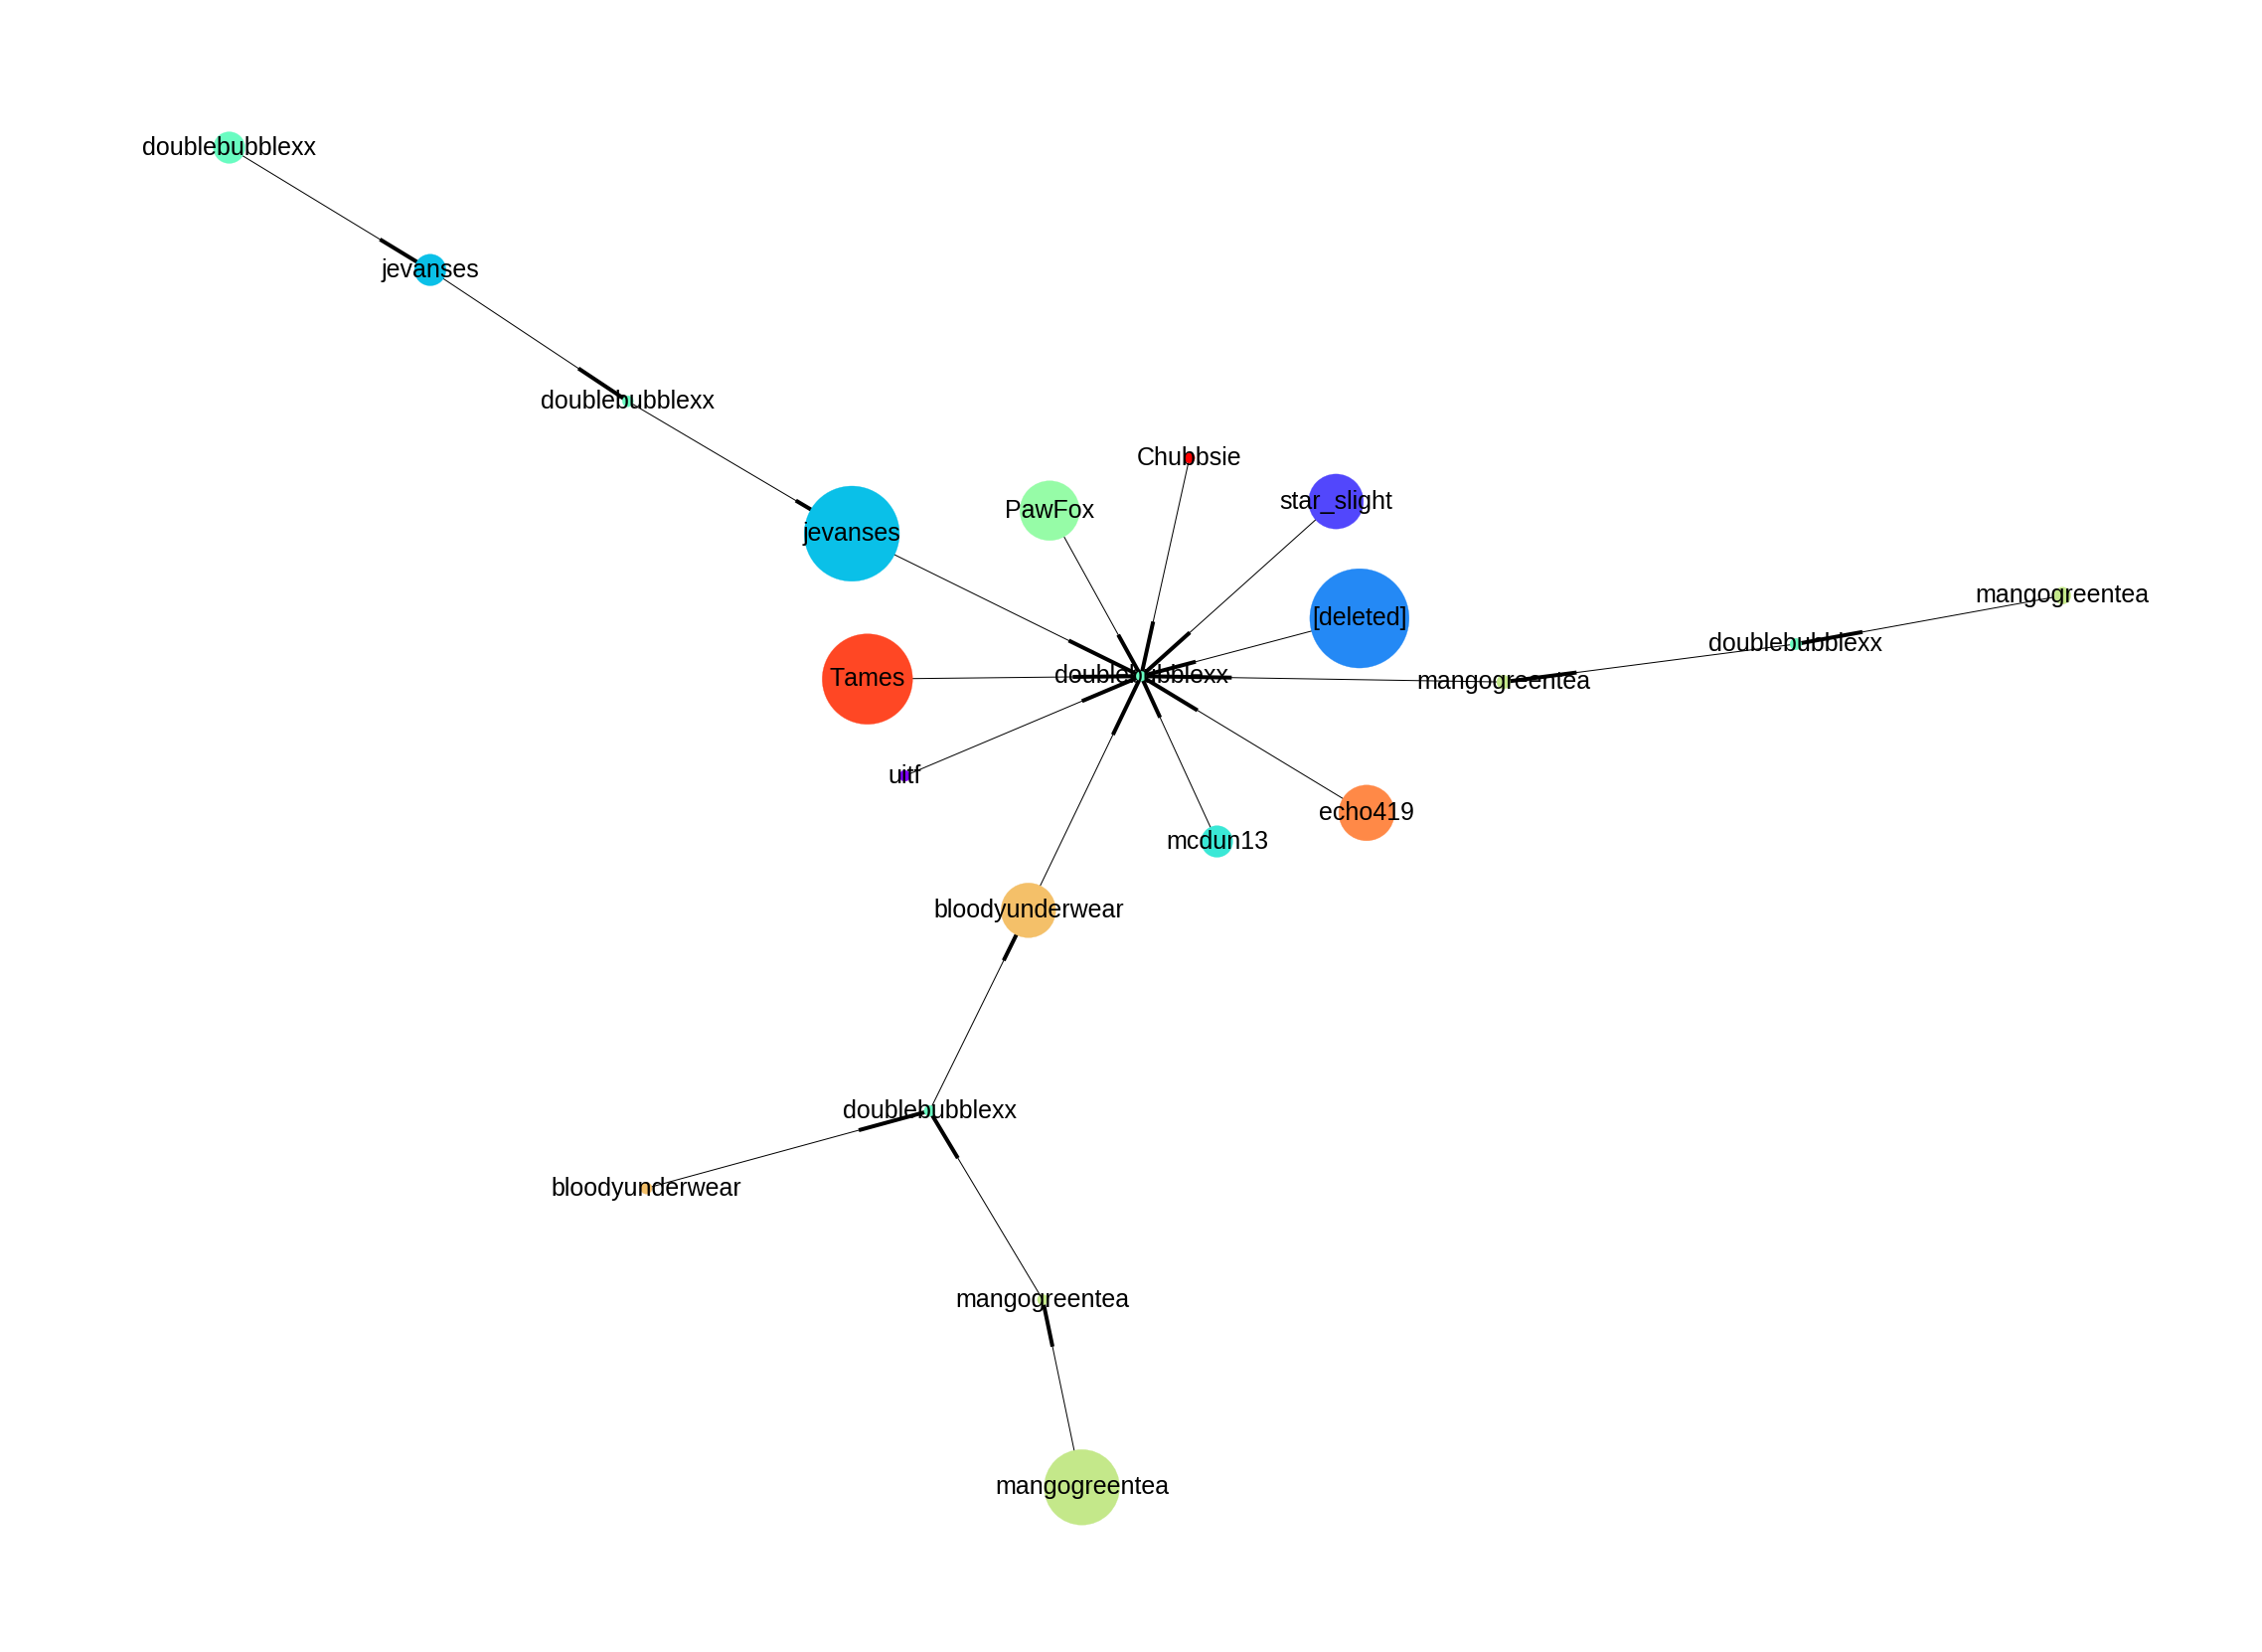

In [23]:
drawReplyGraph(allGraphs_SW[allGraphs_SW.keys()[15]])

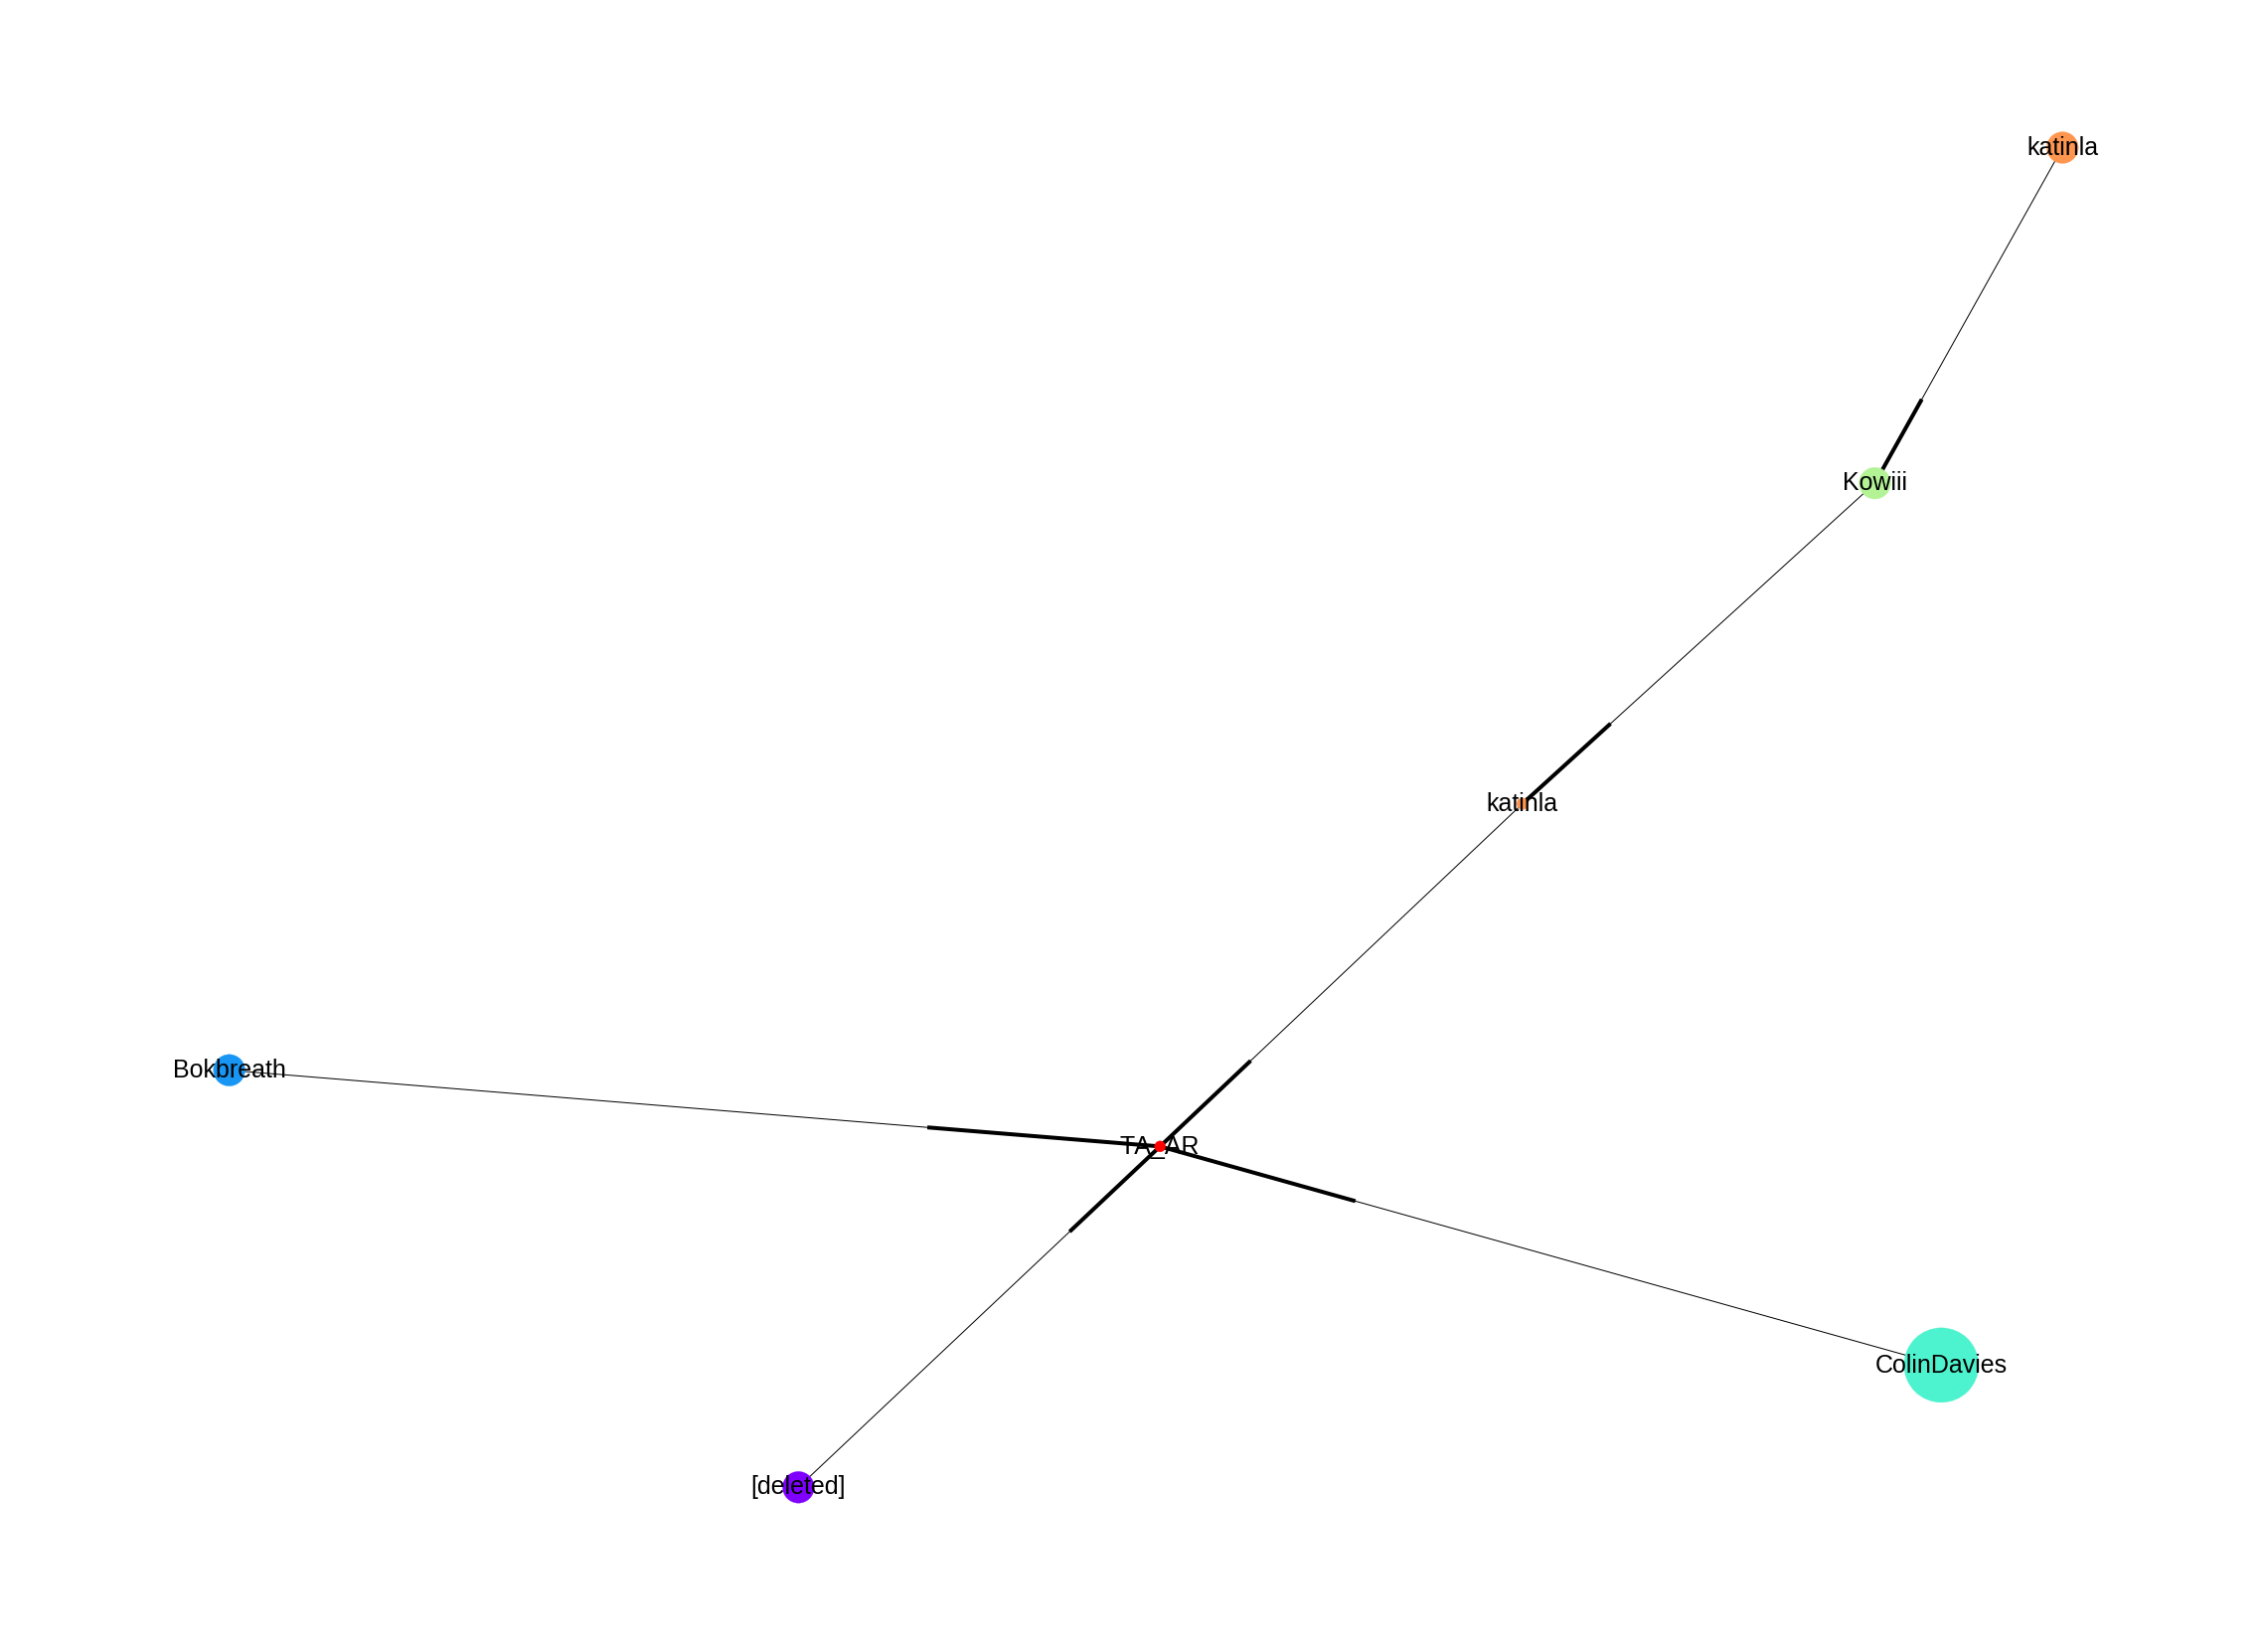

In [24]:
drawReplyGraph(allGraphs_BL[allGraphs_BL.keys()[1]])

In [25]:
userGraphs_SW = createUserGraphs(allGraphs_SW)

In [26]:
userGraphs_BL = createUserGraphs(allGraphs_BL)

In [27]:
print len(userGraphs_SW)

10157


7


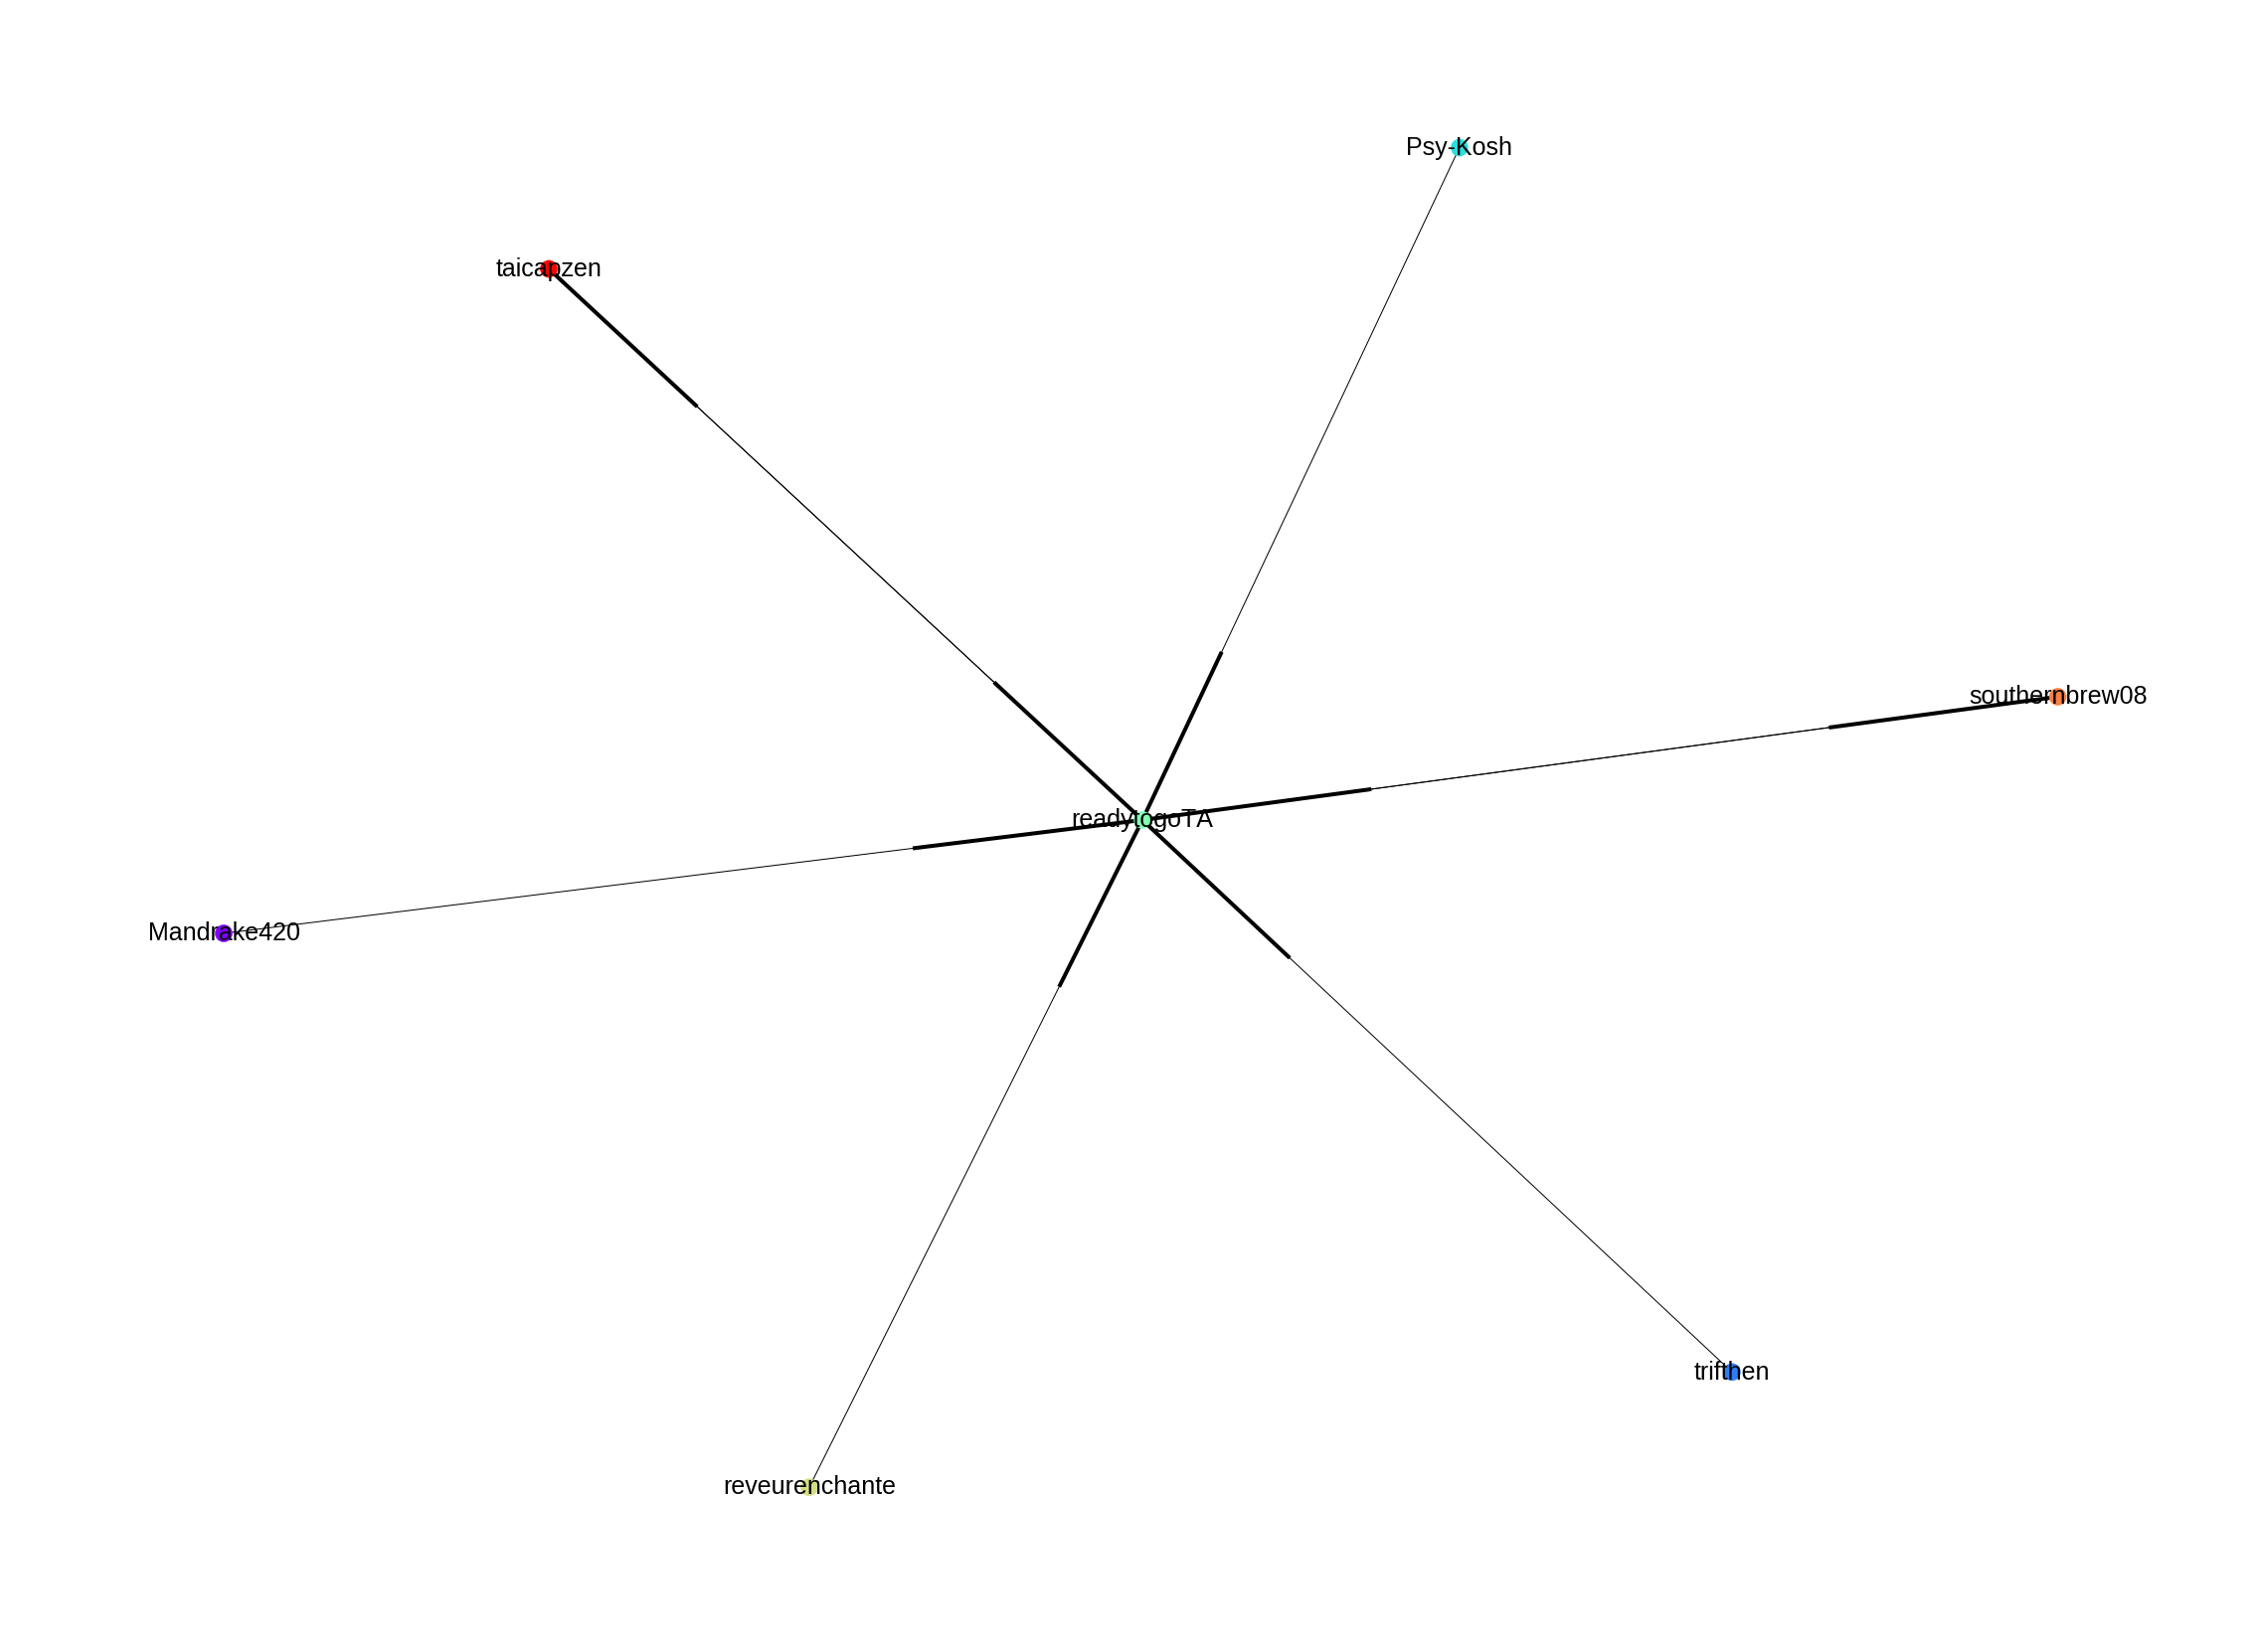

In [28]:
drawUserGraph(userGraphs_SW[allGraphs_SW.keys()[10]])

6


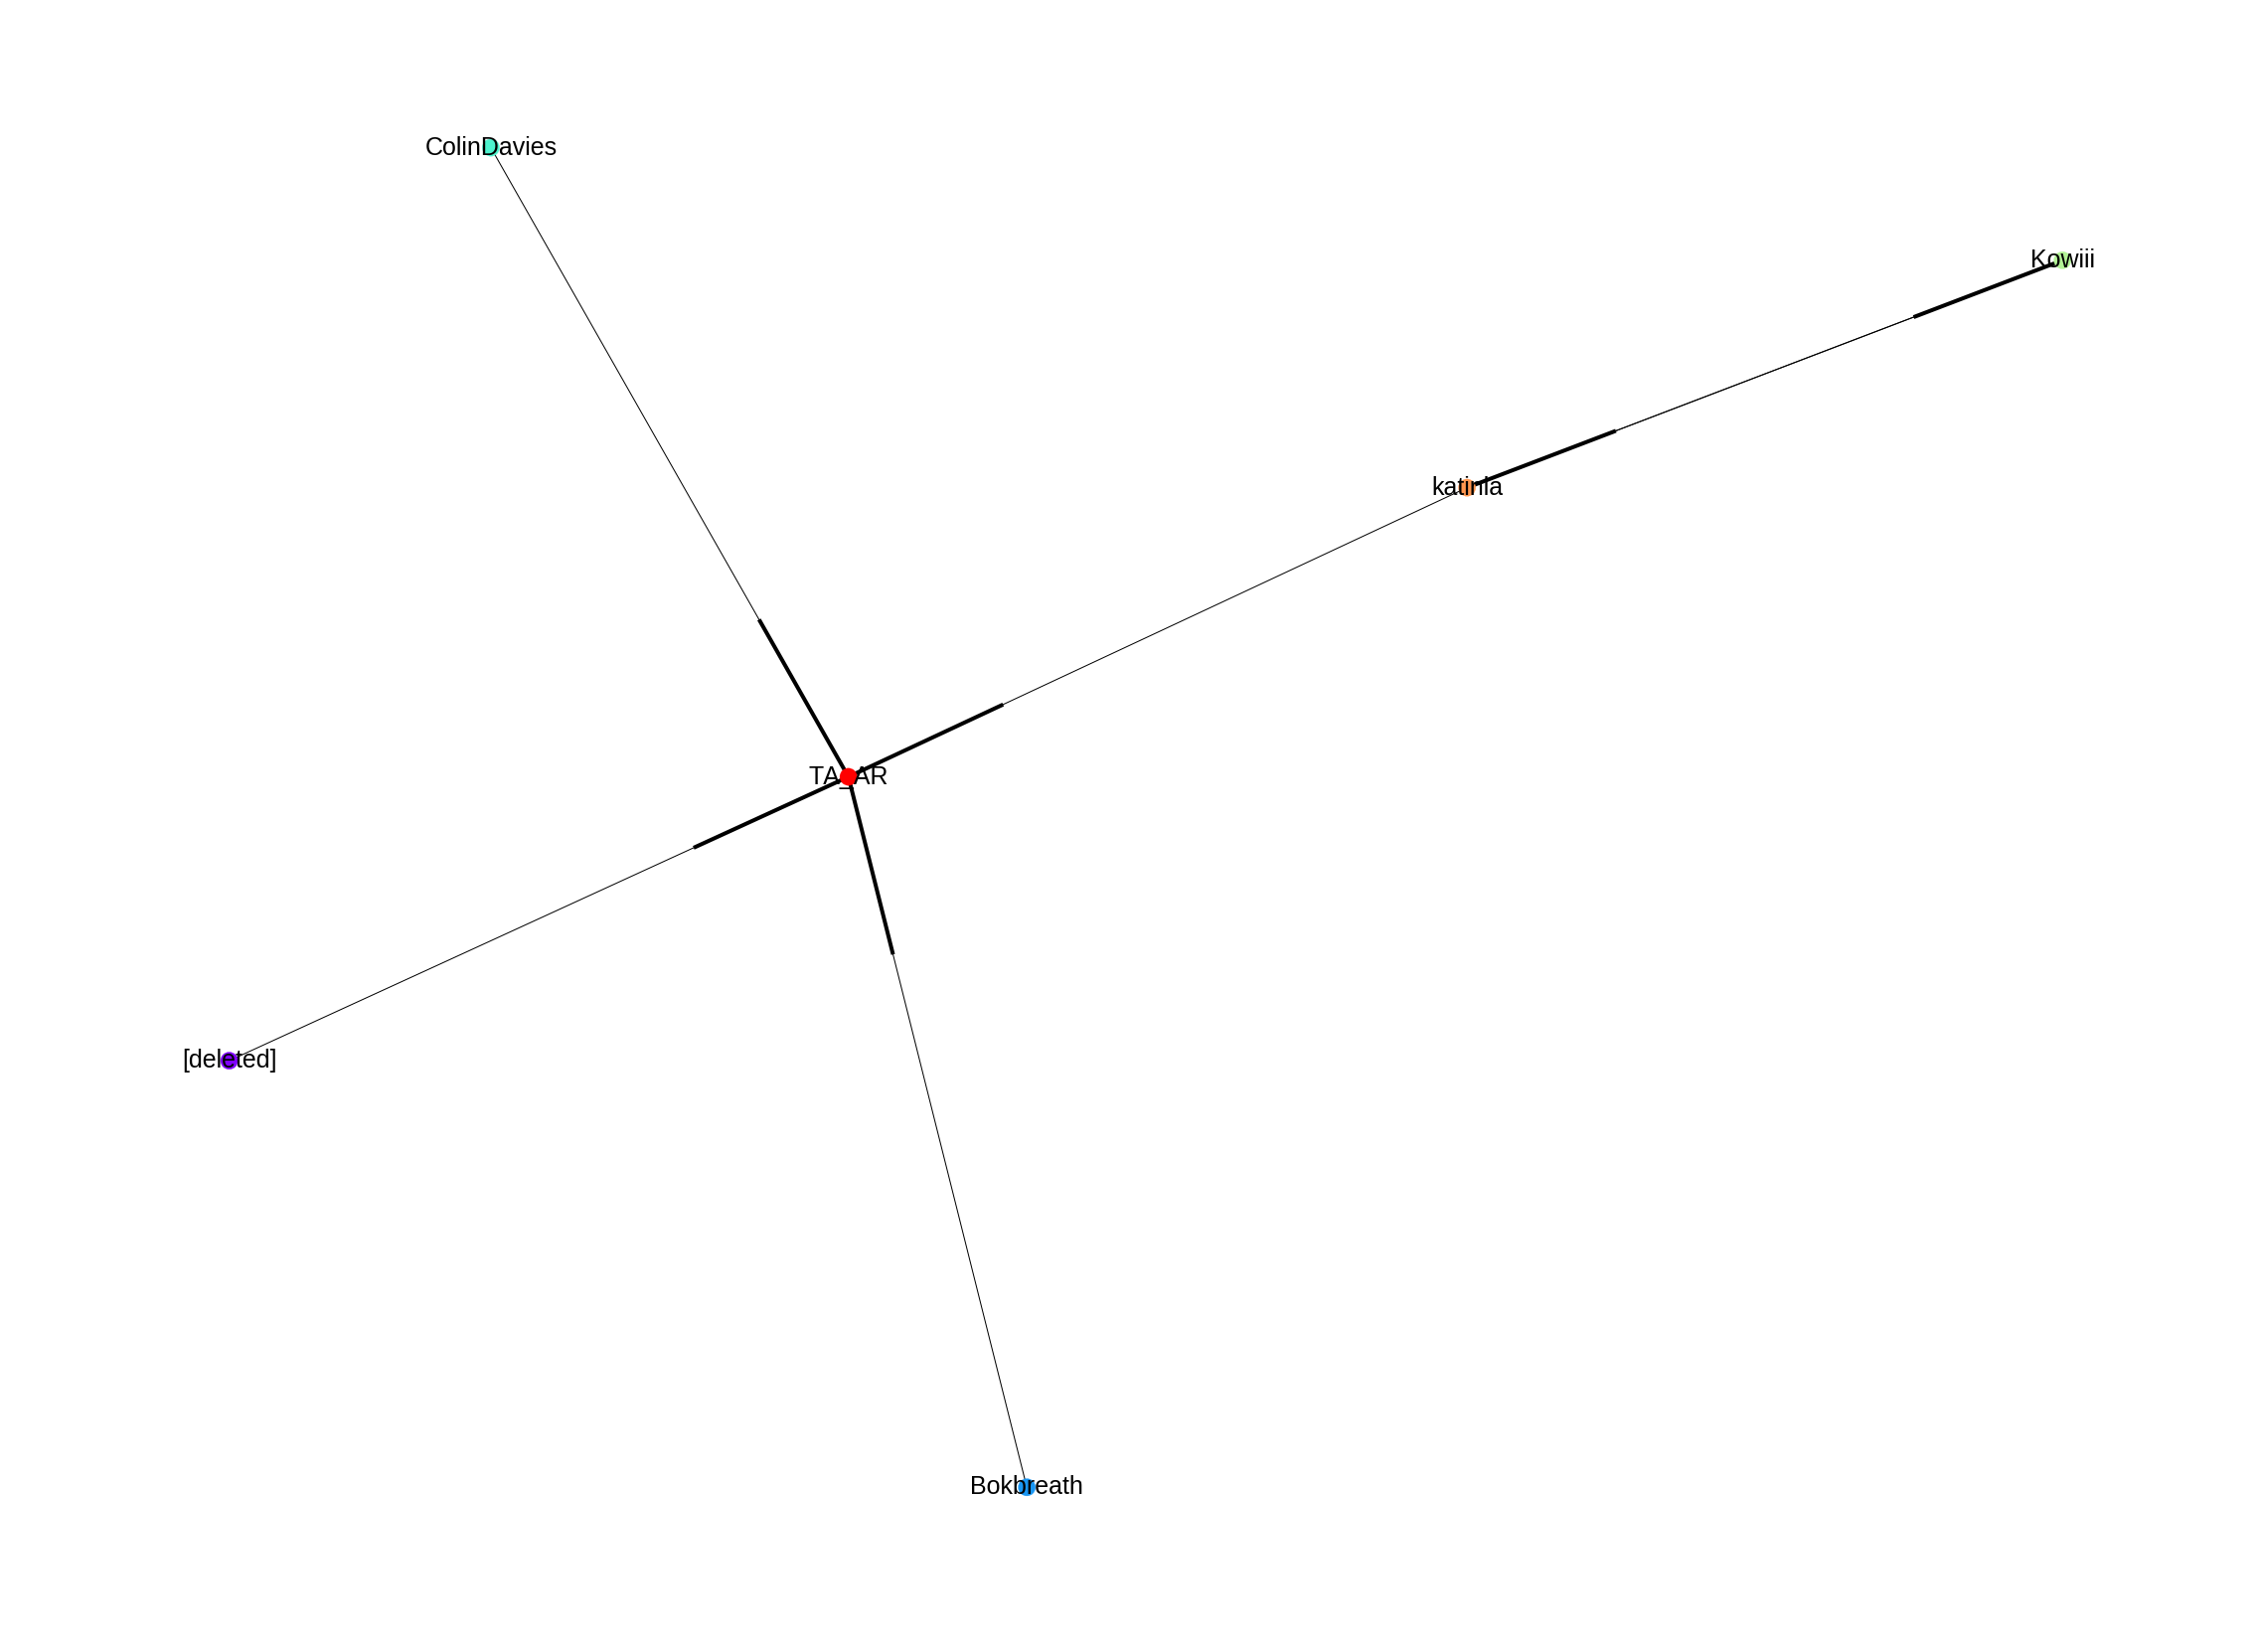

In [29]:
drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [30]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [31]:
opAuthors_SW = getRootauthors(allGraphs_SW)
opAuthors_BL = getRootauthors(allGraphs_BL)

In [32]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

10157 10157
1001 1001


In [33]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

923 8053


In [34]:
sampled = random.sample(filteredUGraphs_SW.keys(),len(filteredUGraphs_BL))
print len(sampled)
sampledUgraphs_SW = {}
sampledReply_SW = {}
for k in sampled: 
    sampledUgraphs_SW[k] = filteredUGraphs_SW[k]
    sampledReply_SW[k] = allGraphs_SW[k]

923


In [35]:
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = allGraphs_BL[k]

In [36]:
len(sampledReply_SW) , len(sampledUgraphs_SW)

(923, 923)

In [37]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

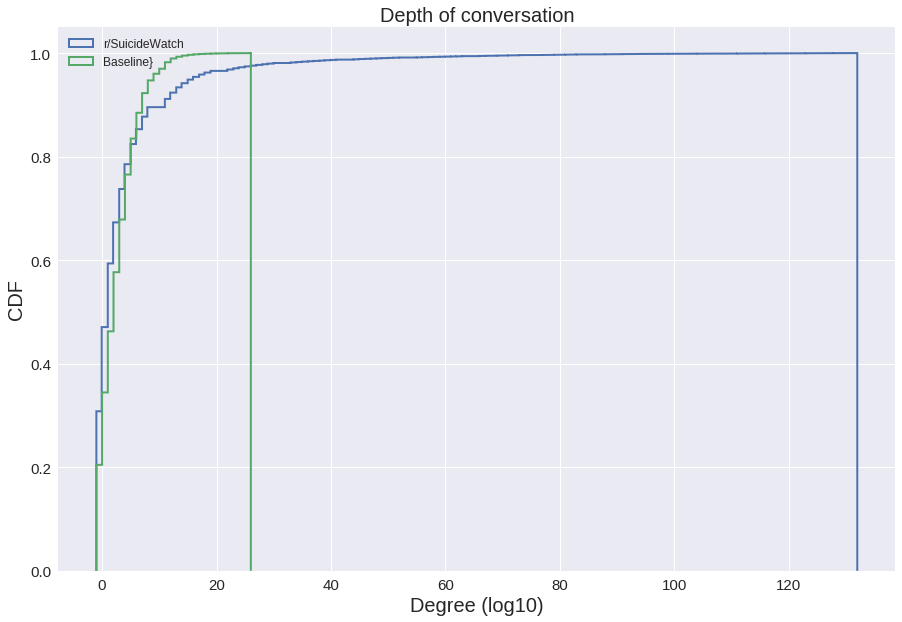

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(getDepths(sampledReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','Baseline}'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

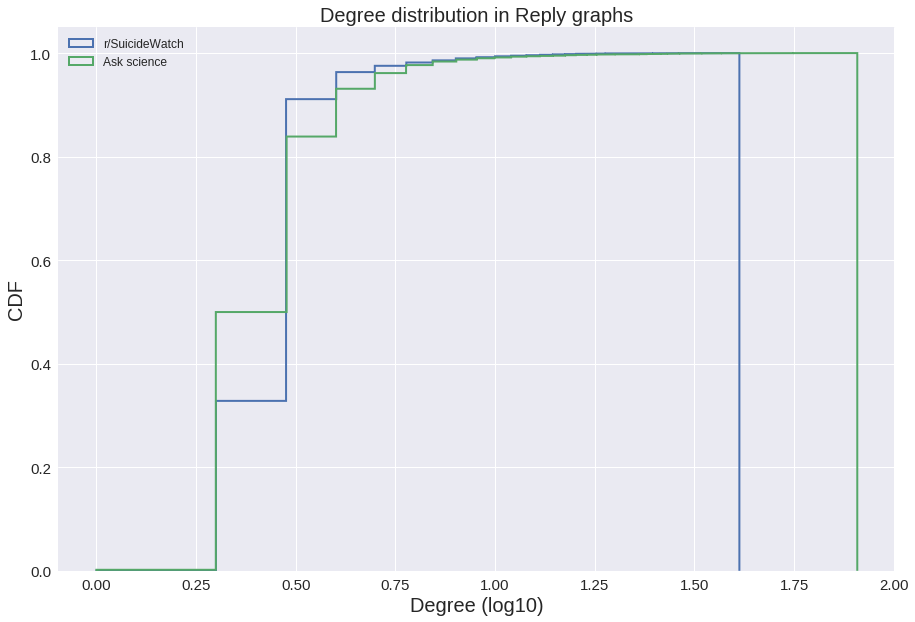

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','Ask science'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

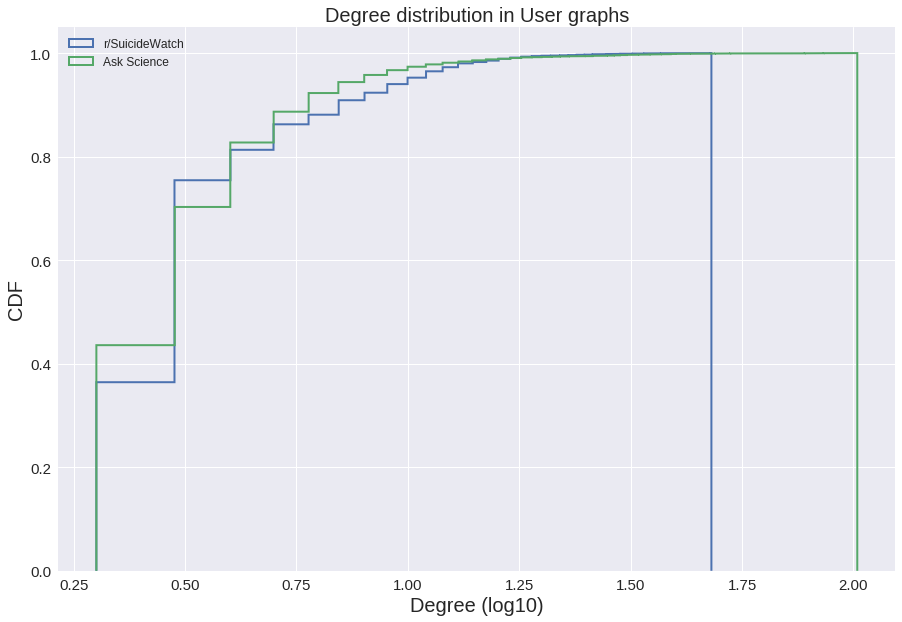

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(sampledUgraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','Ask Science'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [41]:
def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for e in g.edges():
            toMsgs = 0
            fromEdges = 0
            if e[1] == opAuthors[k]:
                if g.has_edge(e[1],e[0]):
                    BPuser +=1 
                    BPusers[k].append(e[0])
                    toMsgs = g.get_edge_data(e[0],e[1])['weight']
                    fromEdges = g.get_edge_data(e[1],e[0])['weight']
                    BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

In [42]:
import operator
def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [43]:
times = nx.get_node_attributes(sampledReply_SW[sampledReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1363736091.0


In [44]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(sampledReply_SW,opAuthors_SW)

In [45]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

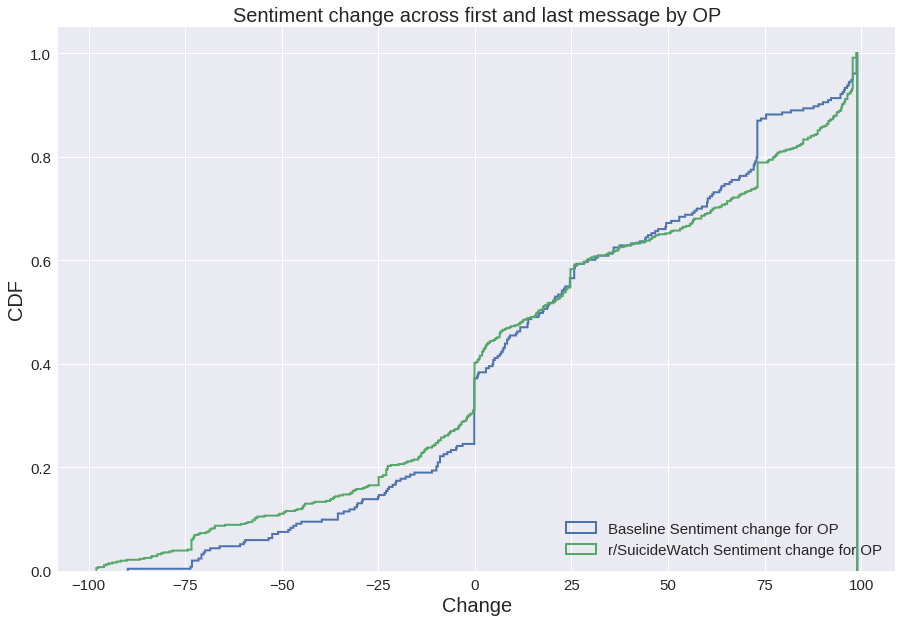

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

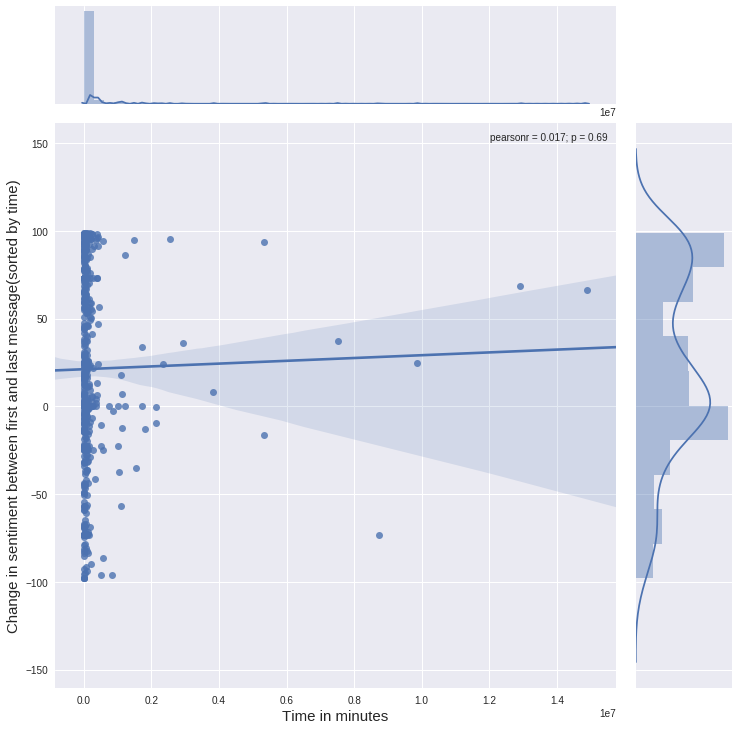

In [47]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [48]:
SW_timeDist = getTimeDistribution(sampledReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

In [49]:
SW_AllTimeDist = getAllTimeDifferences(sampledReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

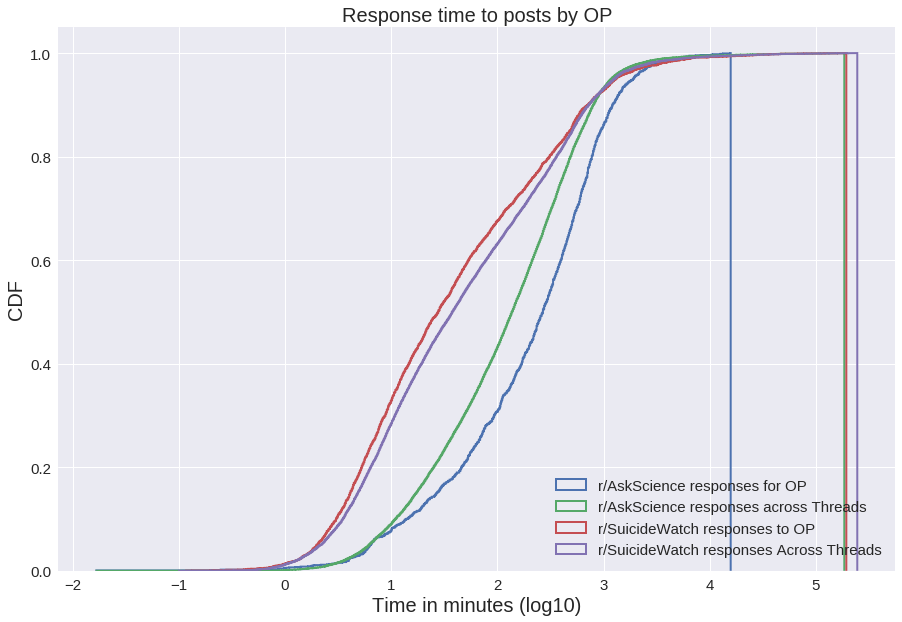

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/AskScience responses for OP', 'r/AskScience responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [51]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(sampledUgraphs_SW,opAuthors_SW)

In [52]:
max(BL_messageParti)

0.6666666666666666

In [53]:
# BPusers['26i7k4']

In [54]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

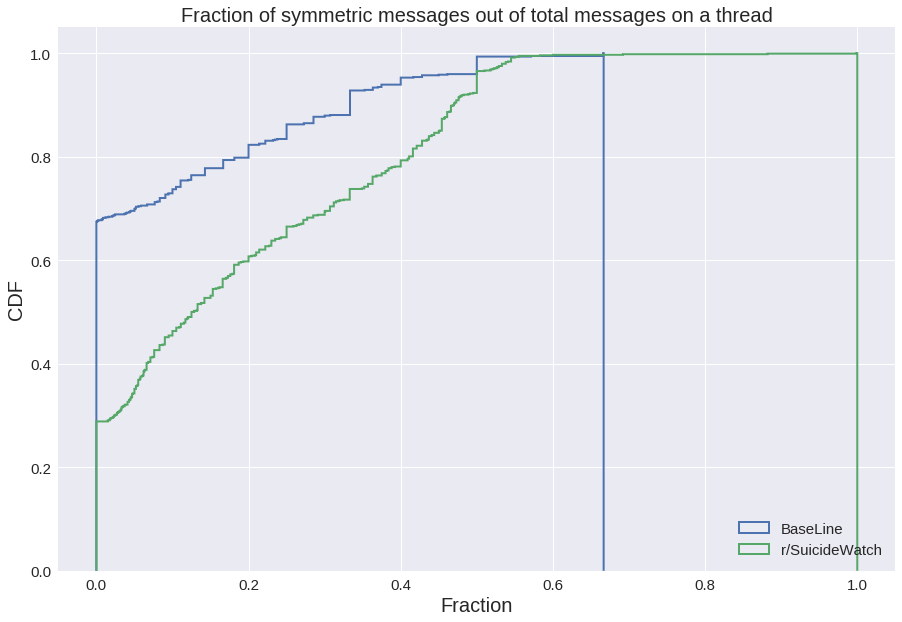

In [55]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BaseLine','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

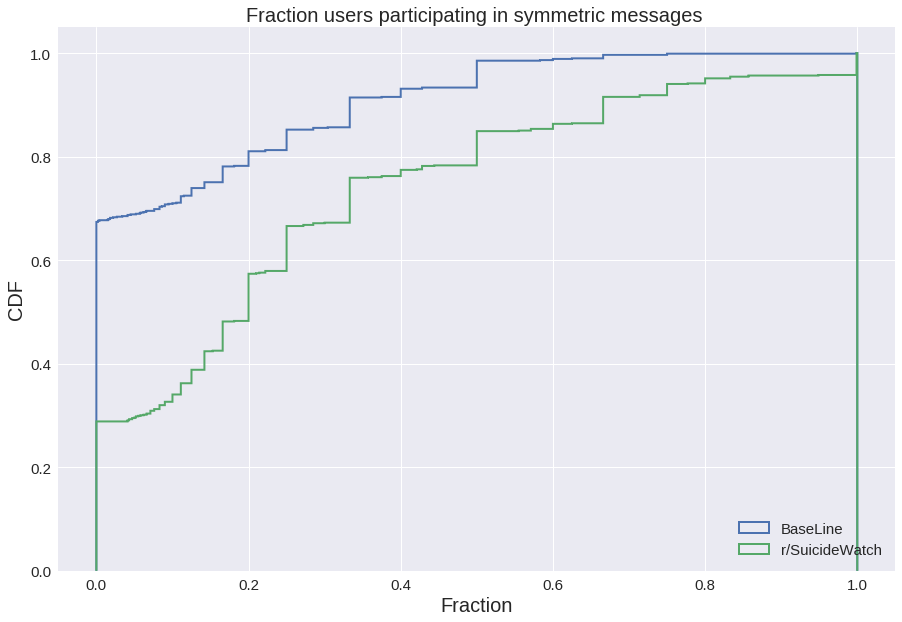

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BaseLine','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [57]:
len(opAuthors_SW) , len(SW_bpusers)

(10157, 923)

In [58]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(-1,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error

In [59]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(sampledReply_SW,SW_bpusers,opAuthors_SW)
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,31)
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,31)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

32 32 32 32


In [60]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,31)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,31)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

32 32 32 32


In [61]:
# sns.distplot(rootEmoDict[7])

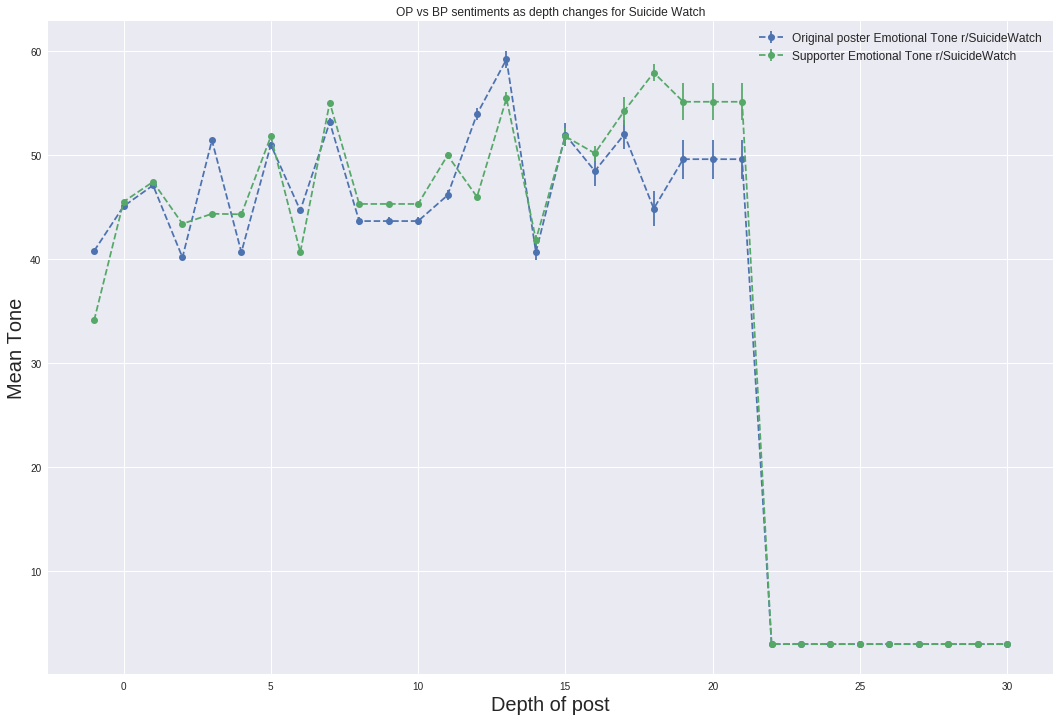

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

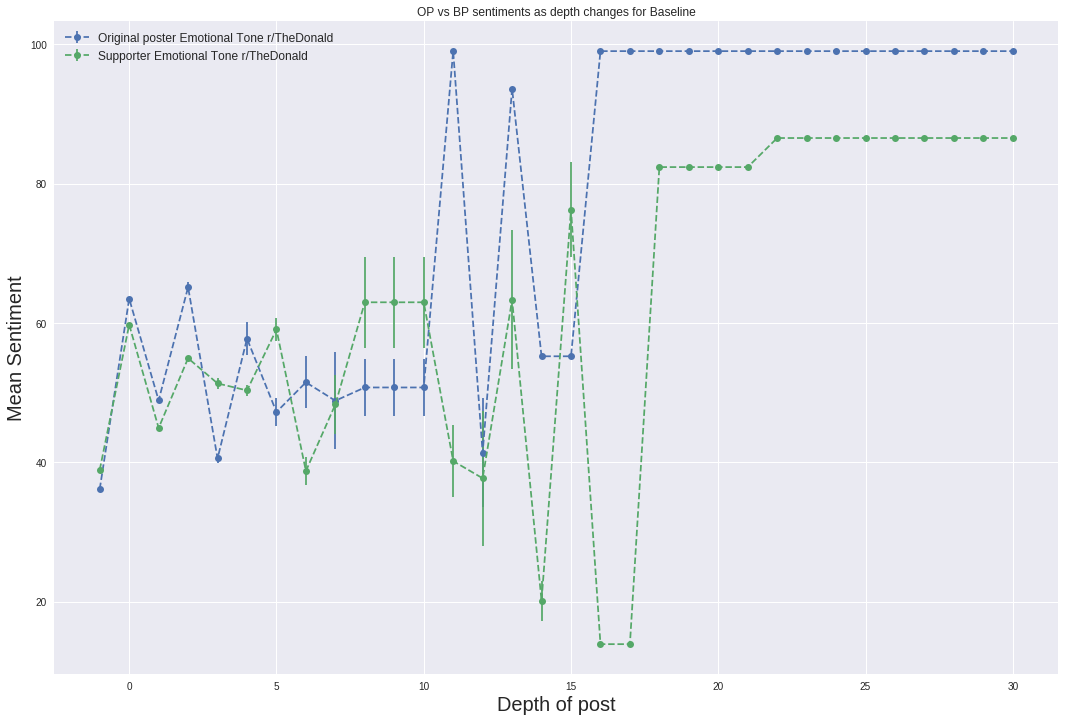

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(-1, 31, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(-1, 31, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [64]:
triangleDist_SW = [sum(list(nx.triangles(sampledUgraphs_SW[k].to_undirected()).values()))/3 for k in sampledUgraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

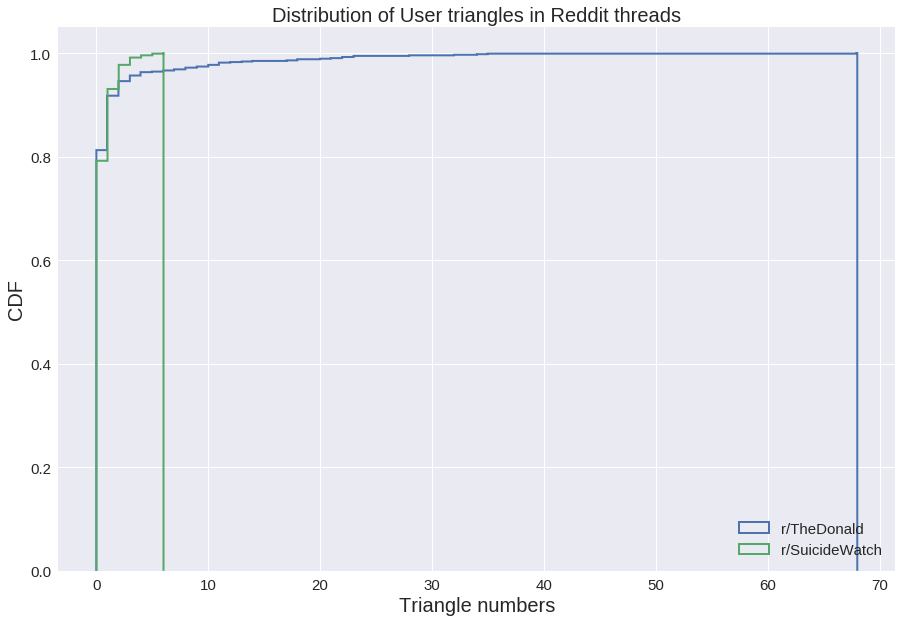

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/TheDonald','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [66]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [67]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [68]:
len(SW_Posts)

NameError: name 'SW_Posts' is not defined

In [69]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import TweetTokenizer

In [70]:
class Tokenizer:
    def __init__(self):
        print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()
    
    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenizeByRegEx(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

In [71]:
len(opAuthors_SW), len(allGraphs_SW)

(10157, 10157)

In [72]:
SW_bpusers[SW_bpusers.keys()[1]]

[u'KITTEN-CAT']

In [73]:
SW_IR_posts = getIRTexts(allGraphs_SW,opAuthors_SW,SW_bpusers)

In [74]:
len(SW_IR_posts)

8492

In [75]:
SW_IR_posts[:10]

[u'Have you tried exploring the virtual life and getting into gaming ? I only can speak for myself but I spend a lot of time with games and videos/streams because there is so much content on the web that needs to get explored. ',
 u'This is my first time on here so bear with me. I think what you are feeling is totally understandable. I\'ve been in situations and points in my life where things just lack excitement or emotion whatsoever. Even recently, last year to be exact, I went through a breakup with my girlfriend of two years and my dad getting divorced from his longtime wife, and I didn\'t feel anything. I knew that I should\'ve been sad but I just wasn\'t. I was bored and apathetic. That feeling lasted for a while, so in that time I decided to find some activities to just pass time. I\'m in college so I just found a cycle. Friends, homework, working out. It was honestly very melancholy, but as time went on I began to find joy in things that I never had before. Working out became a

In [76]:
SW_OP_posts = getOPTexts(allGraphs_SW,opAuthors_SW)


In [77]:
len(SW_OP_posts)

44489

In [78]:
SW_OP_posts[:10]

[u"Dude, please don't. I know a random message from a random person on a subreddit doesn't mean much to you but please don't go. I want to recommend a psychedelic to help you rethink your life but I can't according to the rules. Life can be shitty but don't let that negativity enter your mind, shit just isn't worth it and I hope you truly rethink it all. ",
 u"You've overcome the fear of death so now you can go and live life in a different way. Don't give up so soon my friend. ",
 u'Sometimes you have to live first.....the death part comes later.http://www.youtube.com/watch?v=7_5A8Q_Tzc4',
 u"First and foremost, I reckon you're Australian, so I've just PM'd you my mobile number. I don't work for lifeline, I don't know shit about you and I'm not particularly happy with my life right now, otherwise I wouldn't be in /sw/. Anyway- call me if you want. Next follows my answer.",
 u"I'm in Australia and I'm borderline suicidal. Blame the weather for making you feel blue, but don't blame it fo

In [79]:
SW_BP_posts = getBPTexts(allGraphs_SW, SW_bpusers)

In [80]:
len(SW_BP_posts)

7089

In [81]:
SW_BP_posts[:10]

[u"I've got no damn clue. I'd like too, but I keep thinking of my family. ",
 u"I'd rather write one then leave them guessing. ",
 u"I don't know exactly why I want to do this. I'm not really depressed. I'm a smart guy, I should know better. But why shouldn't I? I'm 16, I don't like my life and I don't see it getting better. I don't like the person I am and I don't see him changing. Why continue if I'm unhappy with everything?When I realized I was going to do it tonight I got an amazing mood. I felt great. Not a care in the world.  I plan on hanging myself sometime in the next half hour. But that could change. I've done this 4 times in the past. I can't keep this up though. Sooner or later I have to either snap out of this or murder myself. Hopefully the latter. I don't know why I'm typing this...Also, what should I put in a suicide note?Edit: looks like it won't be tonight, but I think I need help. How do I go about that? ",
 u"So I can go on another 60+ years disappointing everyone I

In [82]:
sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [83]:
sampled_SW_IR_Posts[:10]

[u"You made a mistake. Guess what? You're human. :)&gt; There is nothing but suffering for me in the future.You're quite right. But then again, even if you never made that mistake, you'd still go through suffering, it'll just be about other things. Life's full of suffering, but how can you know happiness if you haven't known sadness?Please don't beat yourself up about what happened in the past and what's going to happen in the future. You never know what could happen as you go through all of this. I think it's too premature for you to be considering suicide. Wait it out a little bit more, even if its just a day. Before all this happened, was there anything in particular you enjoyed doing? Anyone you talked to?",
 u"Your university doesn't have any exemptions for medical conditions?",
 u"It seems that the more I understand my problem, the more hopeless and insurmountable it becomes. Each year my situation has gotten worse. I'm now 23 years old, on the last few days of money I have left 

In [84]:
len(SW_OP_posts) , len(SW_BP_posts) , len(sampled_SW_IR_Posts)

(44489, 7089, 7089)

In [85]:
OP_cleaned_text = tokenizeTexts(SW_OP_posts)
BP_cleaned_text = tokenizeTexts(SW_BP_posts)
IR_cleaned_text = tokenizeTexts(sampled_SW_IR_Posts)

Created Tokenizer
Created Tokenizer
Created Tokenizer


In [86]:
len(OP_cleaned_text) , len(BP_cleaned_text)

(44489, 7089)

In [87]:
# OP_cleaned_text[1]

In [88]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(OP_cleaned_text+BP_cleaned_text+IR_cleaned_text)
# dictionary_BP =gensim.corpora.Dictionary(BP_cleaned_text)

In [89]:
len(dictionary)

32427

In [90]:
# len(dictionary_OP) , len(dictionary_BP)

In [91]:
# convert tokenized documents into a document-term matrix
corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
corpus_BP = [dictionary.doc2bow(text) for text in BP_cleaned_text]
corpus_IR = [dictionary.doc2bow(text) for text in IR_cleaned_text]
# corpus = [dictionary.doc2bow(text) for text in OP_cleaned_text+BP_cleaned_text+IR_cleaned_text]

In [92]:
len(corpus_OP),len(corpus_BP) , len(corpus_IR)

(44489, 7089, 7089)

In [93]:
# len(corpus)

In [94]:
# type(corpus_OP)

In [95]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

In [96]:
ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=50) 

In [97]:
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=50) 

In [98]:
ldamodel_IR[corpus_IR[11]]

[(6, 0.019426398),
 (11, 0.27579889),
 (19, 0.053299129),
 (21, 0.3484143),
 (33, 0.063976511),
 (37, 0.1995336),
 (39, 0.032200746)]

In [ ]:
ldamodel_BP.print_topics(10)

In [ ]:
# ldamodel_OP.print_topics(10)

In [ ]:
ldamodel_IR.print_topics(10)

In [472]:
TP_OP = gensim.

TypeError: get_topic_terms() takes at least 2 arguments (1 given)